In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Diwali Sales Data.csv", encoding="unicode_escape")

In [8]:
df.shape

(11251, 15)

In [6]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [9]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [11]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.shape

(11239, 13)

In [14]:
df["Amount"] = df["Amount"].astype(int)

In [15]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [18]:
df.describe()
df[["Age", "Orders", "Amount"]].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [19]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')


Exploratory Data Analysis

Gender

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9552\3561705739.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = "Gender", data=df, palette="colorblind")


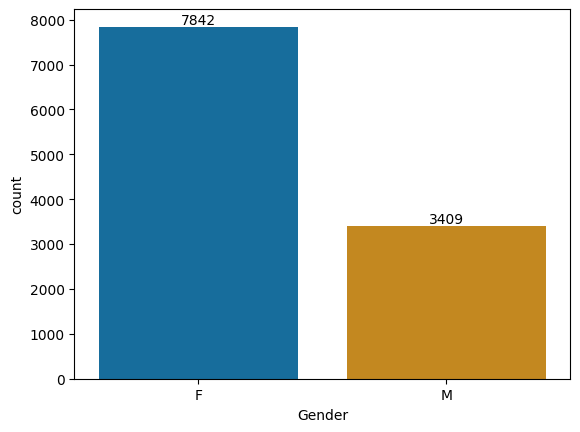

In [4]:
ax = sns.countplot(x = "Gender", data=df, palette="colorblind")
for bar in ax.containers :
    ax.bar_label(bar)


In [28]:
df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9552\1816901952.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= "Gender", y="Amount", data=sales_gen, palette='colorblind')


<Axes: xlabel='Gender', ylabel='Amount'>

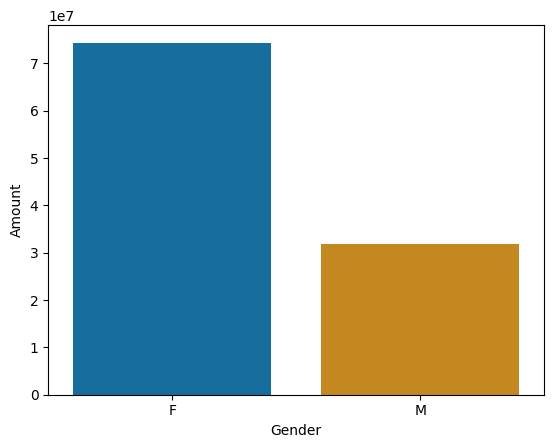

In [7]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending=False)
sns.barplot(x= "Gender", y="Amount", data=sales_gen, palette='colorblind')


From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

Age

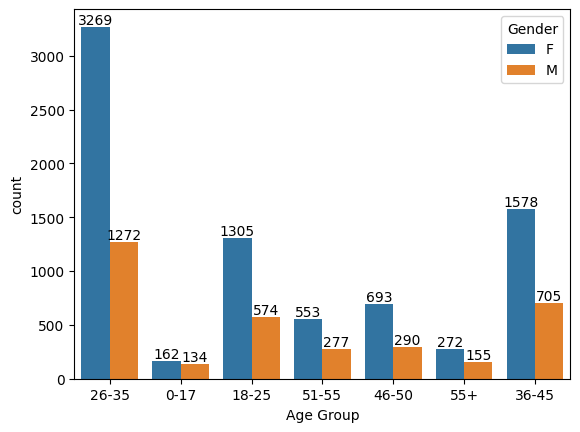

In [36]:
ax = sns.countplot(x= 'Age Group', hue= 'Gender', data= df )
for bar in ax.containers:
    ax.bar_label(bar)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9552\169670294.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Age Group', y='Amount', data=sales_age, palette= 'colorblind')


<Axes: xlabel='Age Group', ylabel='Amount'>

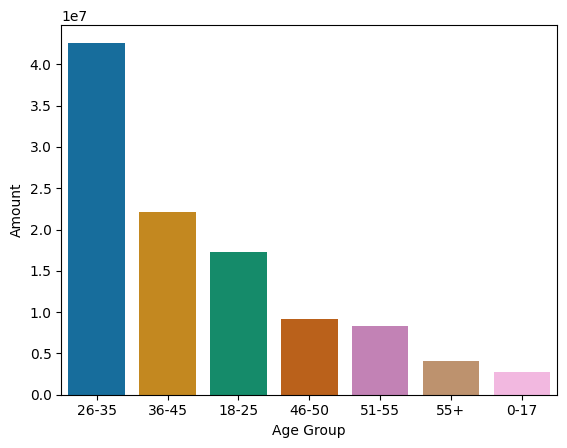

In [8]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending= False)
sns.barplot(x = 'Age Group', y='Amount', data=sales_age, palette= 'colorblind')


From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

State

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9552\3273195827.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= order_state, x= 'State', y='Orders', palette='colorblind')


<Axes: xlabel='State', ylabel='Orders'>

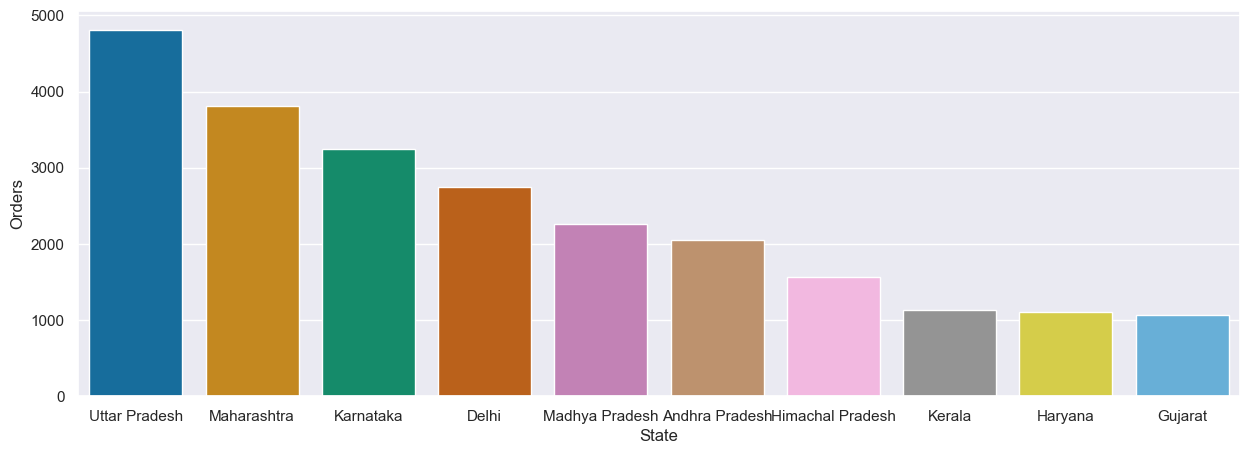

In [9]:
order_state = df.groupby(['State'], as_index= False)['Orders'].sum().sort_values(by = 'Orders', ascending= False).head(10)
sns.set(rc={'figure.figsize': (15,5)})
sns.barplot(data= order_state, x= 'State', y='Orders', palette='colorblind')


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9552\1279256350.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Amount', data=amount_state, palette= 'colorblind')


<Axes: xlabel='State', ylabel='Amount'>

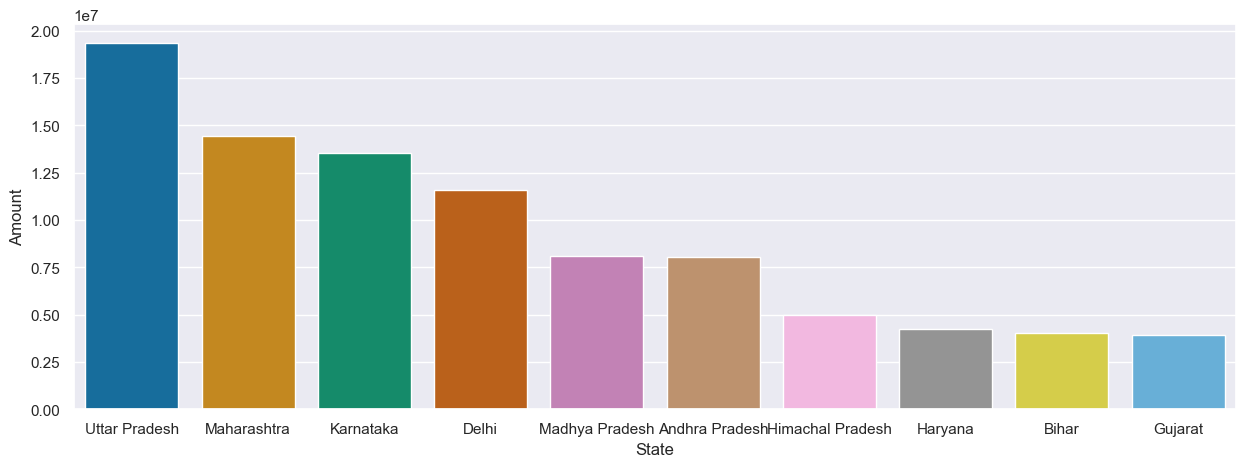

In [11]:
amount_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize' : (15,5)})
sns.barplot(x='State', y='Amount', data=amount_state, palette= 'colorblind')

From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively


Marital Status

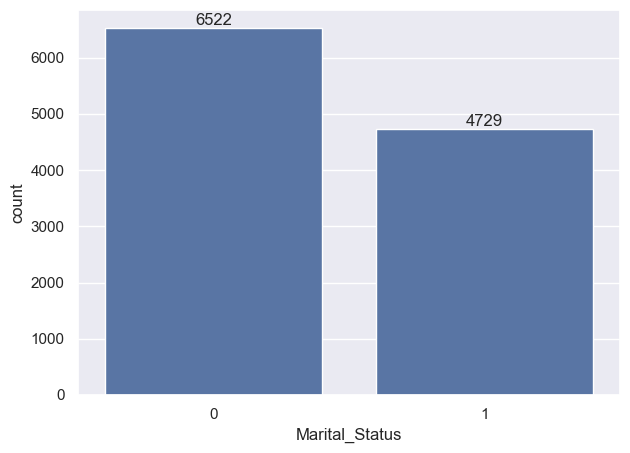

In [18]:
ms =sns.countplot(x = 'Marital_Status', data= df)
sns.set(rc={'figure.figsize' :(7,5)})
for bar in ms.containers:
    ms.bar_label(bar)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

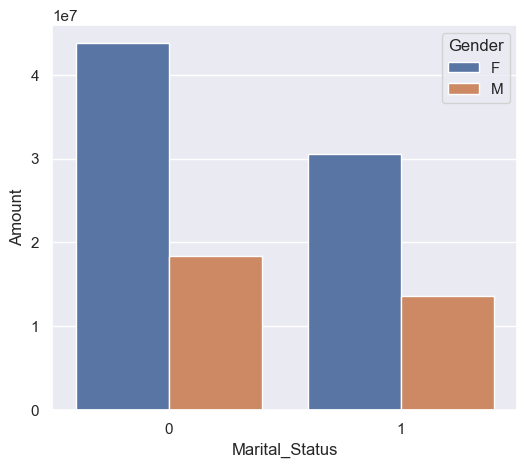

In [71]:
ms_amount  = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = ms_amount, x = 'Marital_Status',y= 'Amount', hue='Gender')

From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

Occupation

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9552\1907844858.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  oc = sns.countplot(data = df, x = 'Occupation', palette= 'colorblind')


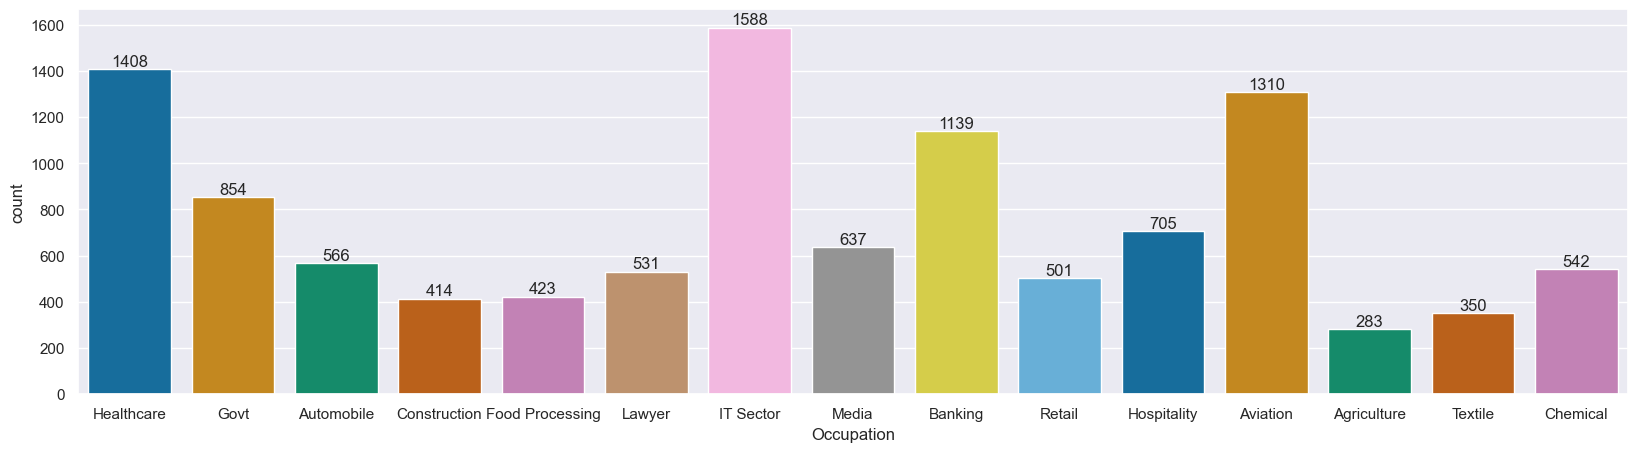

In [12]:
sns.set(rc={'figure.figsize': (20,5)})
oc = sns.countplot(data = df, x = 'Occupation', palette= 'colorblind')
for bar in oc.containers:
    oc.bar_label(bar)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9552\1088567567.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Occupation', y='Amount', data=oc_amount, palette= 'colorblind')


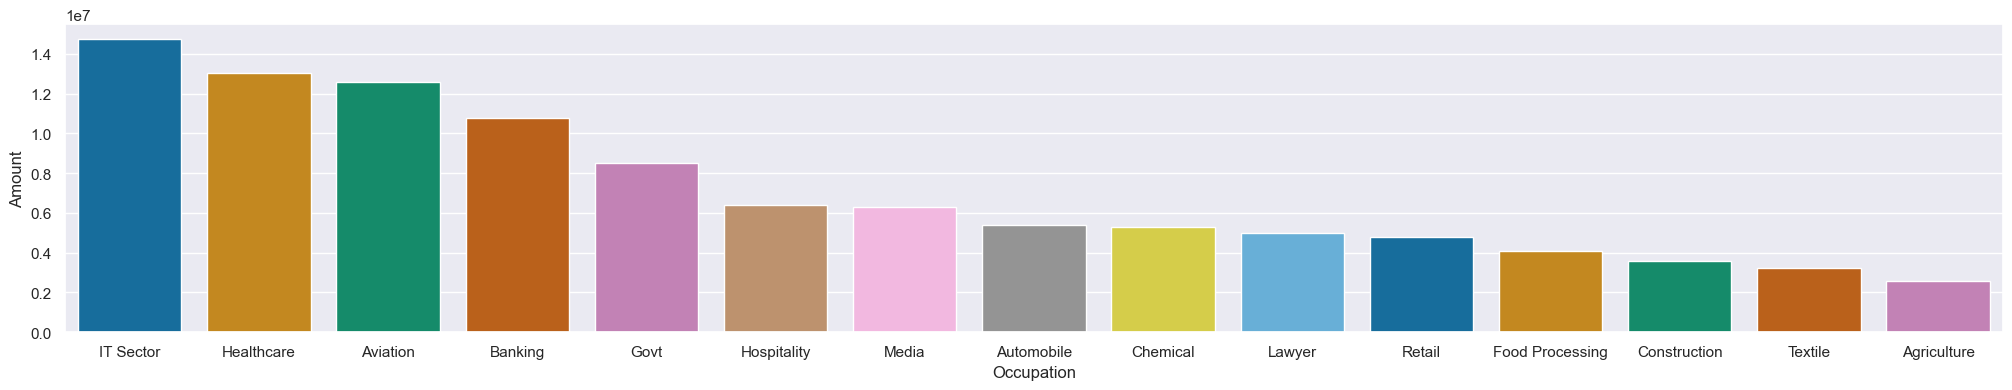

In [24]:
oc_amount = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending= False)
sns.barplot(x='Occupation', y='Amount', data=oc_amount, palette= 'colorblind')
sns.set(rc={'figure.figsize' : (27,6)})


From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

Product Category

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9552\75362547.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pc = sns.countplot(data = df, x = 'Product_Category', palette= 'colorblind')


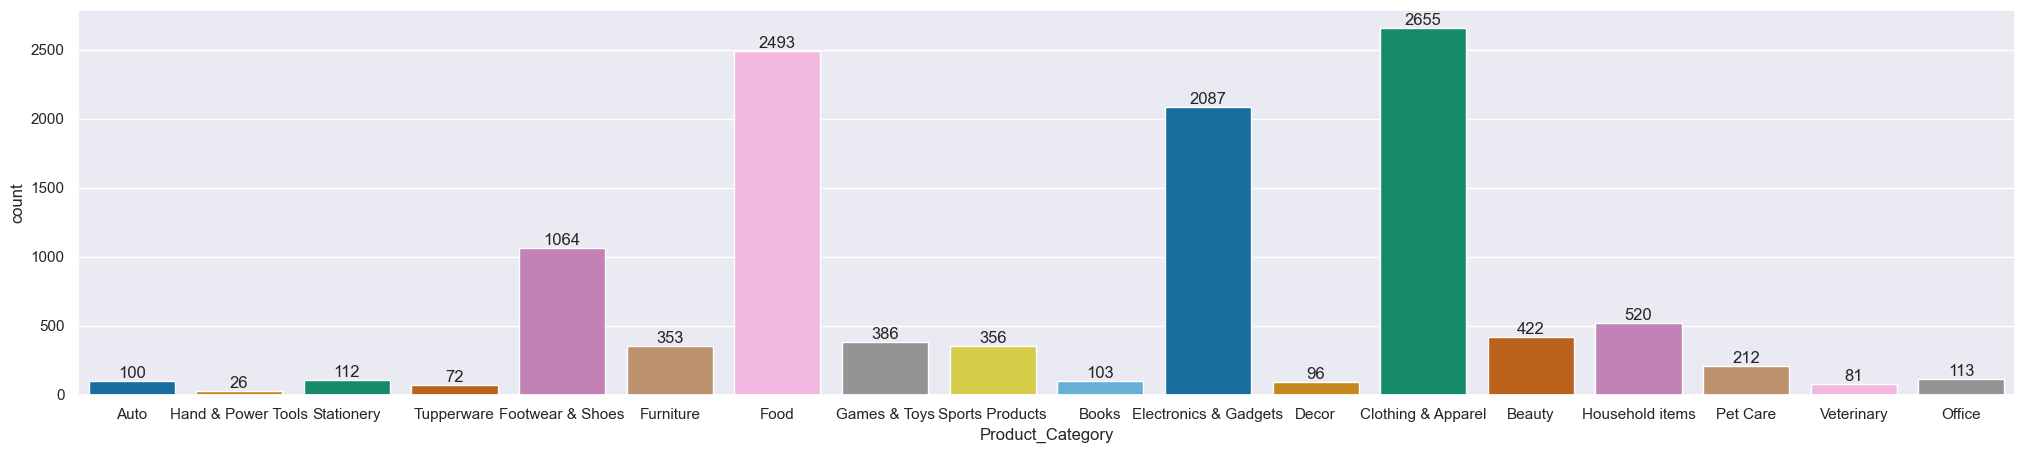

In [15]:
sns.set(rc={'figure.figsize':(25,5)})
pc = sns.countplot(data = df, x = 'Product_Category', palette= 'colorblind')

for bars in pc.containers:
    pc.bar_label(bars)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9552\722203454.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = pc_amount, x = 'Product_Category',y= 'Amount', palette= 'colorblind')


<Axes: xlabel='Product_Category', ylabel='Amount'>

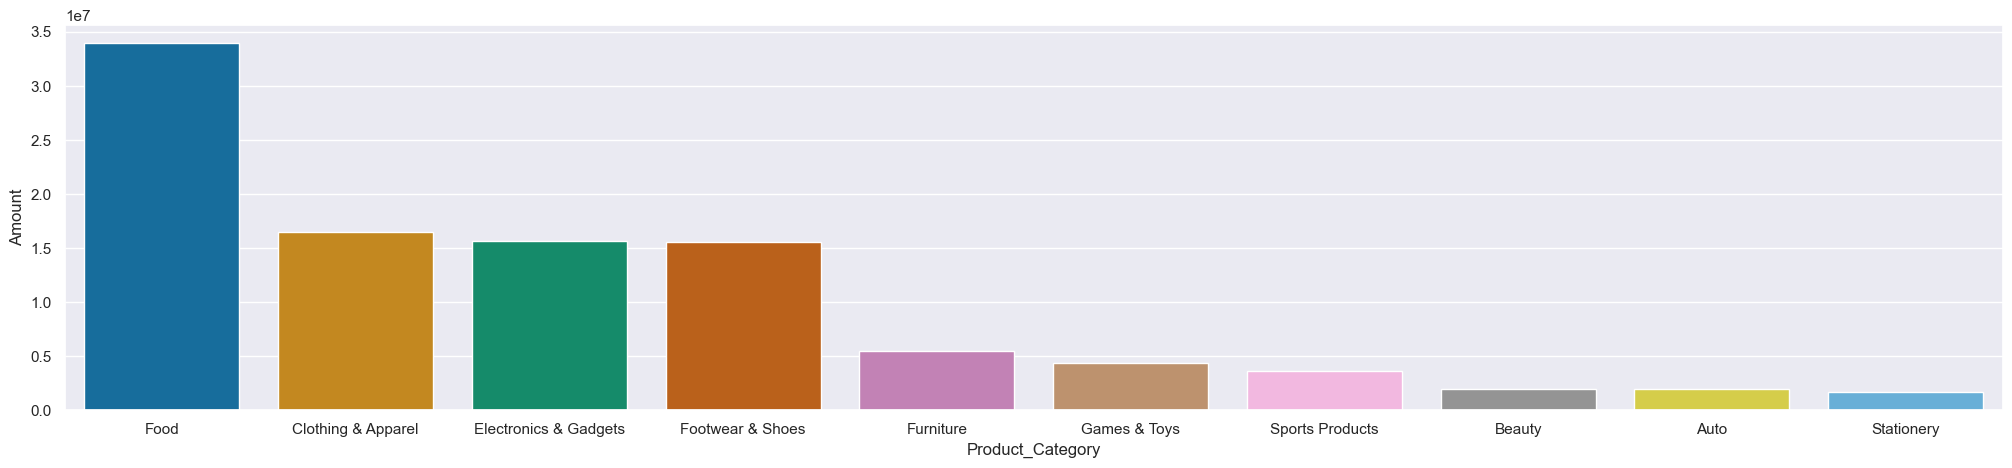

In [14]:
pc_amount = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(data = pc_amount, x = 'Product_Category',y= 'Amount', palette= 'colorblind')

From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

Product ID

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9552\830235090.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders', palette= 'colorblind')


<Axes: xlabel='Product_ID', ylabel='Orders'>

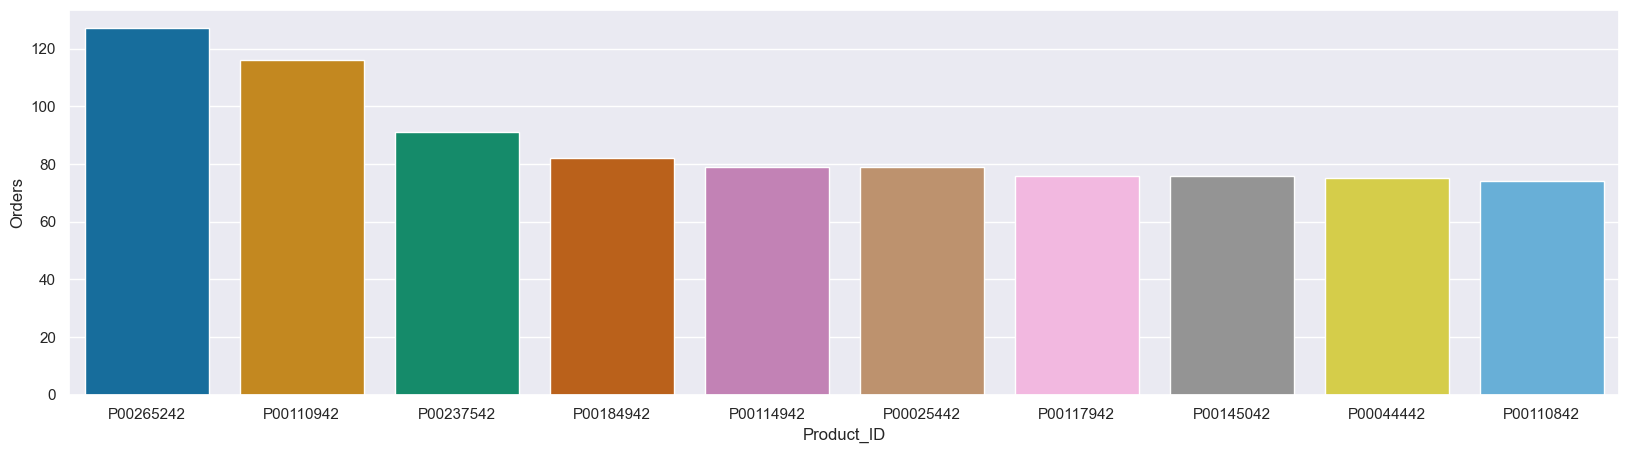

In [13]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders', palette= 'colorblind')

<Axes: xlabel='Product_ID'>

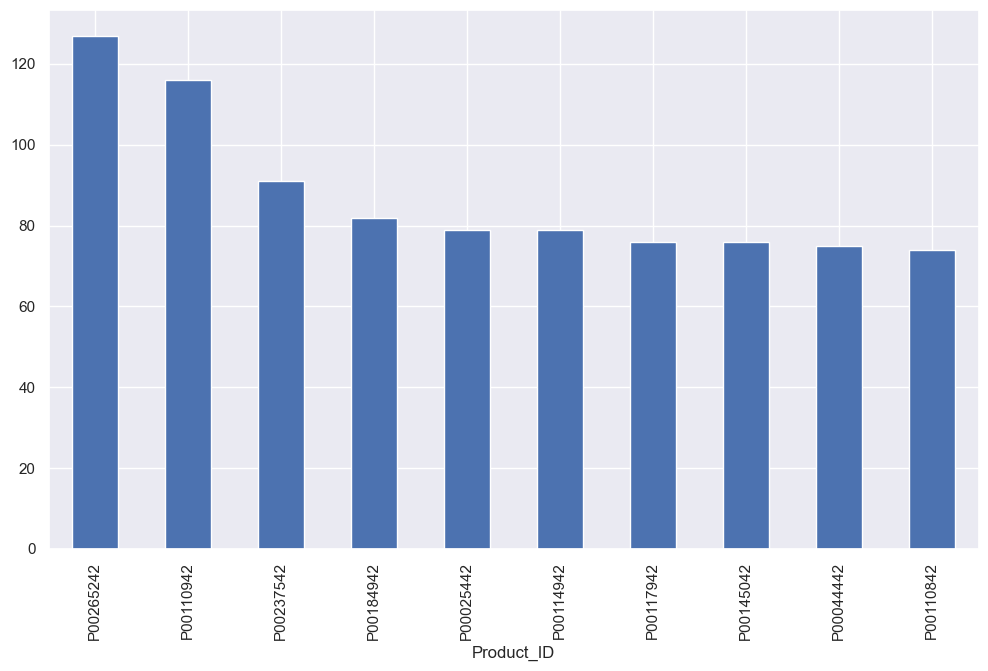

In [25]:
fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

From the above graph we can see the relation between orders and product ID

Conclusion:
Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category